In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../Datasets/Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
import math
N = 10000
d = 10
n_selection = [0 for i in range(d)]
sums_reward = [0 for i in range(d)]
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if n_selection[i] > 0:
            ave_reward = sums_reward[i] / n_selection[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/n_selection[i])
            upper_bound = ave_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    n_selection[ad] = n_selection[ad] + 1
    reward = dataset.values[n, ad]
    sums_reward[ad] += reward
    total_reward += reward

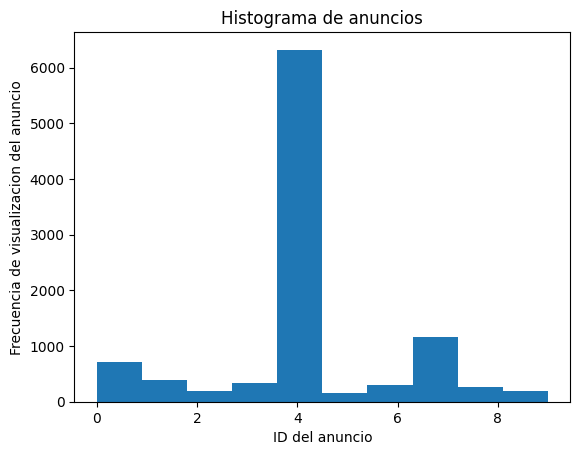

In [4]:
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del anuncio")
plt.ylabel("Frecuencia de visualizacion del anuncio")
plt.show()